In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pytesseract
from PIL import Image
import Dataset
import argparse
import imutils
import sys
from random import randint
import pickle
import math
import copy

In [2]:
def get_contour_area(contours):
#returns the areas of all the contours
    all_areas=[]
    for cnt in contours:
        area=cv2.contourArea(cnt)
        all_areas.append(area)
        return all_areas

In [3]:
def label_contour_center(image,c):
    M=cv2.moments(c)
    cx=int(M['m10']/M['m00'])
    cy=int(M['m01']/M['m00'])
    
   # cv2.circle(image,(cx,cy),2,(0,0,255),-1)
    return image

In [4]:
def x_cord_contour(contour):
    if cv2.contourArea(contour)>10:
        M=cv2.moments(contour)
        return (int(M['m10']/M['m00']))
    return (0)

In [5]:
def sort_contours(cnts):
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
        key=lambda b:b[1][i], reverse=False))
    return(cnts,boundingBoxes)

In [6]:
def get_contour_precedence(contour, cols):
    tolerance_factor = 10
    origin = cv2.boundingRect(contour)
    return ((origin[1] // tolerance_factor) * tolerance_factor) * cols + origin[0]


In [7]:
def draw_contour(image, c, i):
    # compute the center of the contour area and draw a circle
    # representing the center
    if cv2.contourArea(c)>10:    
        M = cv2.moments(c)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])

        # draw the countour number on the image
        cv2.putText(image, "#{}".format(i + 1), (cX - 20, cY), cv2.FONT_HERSHEY_SIMPLEX,
            1.0, (255, 255, 255), 2)

        # return the image with the contour number drawn on it
        return image
    else:
        return(0)

# Appendix A

In [58]:
#Test image is uplaoded

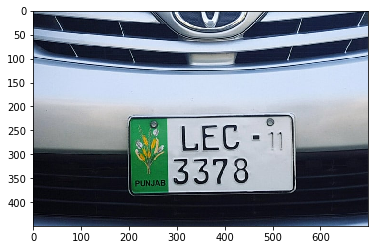

In [137]:
test_picture=cv2.imread('./test.jpg')
test_picture=cv2.cvtColor(test_picture, cv2.COLOR_BGR2RGB)
# gray=cv2.cvtColor(wow,cv2.COLOR_BGR2GRAY)
plt.imshow(test_picture)

In [138]:
#Filter is uploaded

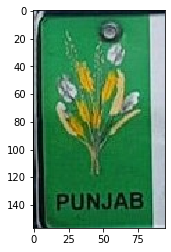

In [139]:
filter_image=cv2.imread('./filter1.jpg')
filter_image=cv2.cvtColor(filter_image,cv2.COLOR_BGR2RGB)
filter_gray=cv2.cvtColor(filter_image,cv2.COLOR_BGR2GRAY)
plt.imshow(filter_image)

In [140]:
#Convolution is done through Opencv's own function

In [141]:
result=cv2.matchTemplate(test_picture,filter_image,cv2.TM_CCOEFF)
min_val,max_val,min_loc,max_loc=cv2.minMaxLoc(result)

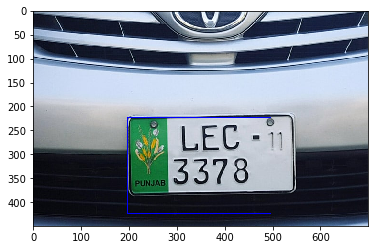

In [142]:
#A box is created around the the convolution result and its coordinates are stored 
top_left=max_loc
bottom_right=(top_left[0]+300,top_left[1]+200)
cv2.rectangle(test_picture,top_left,bottom_right,(0,0,255),1)
plt.imshow(test_picture)

In [143]:
print(top_left[0])
print(top_left[1])
print(top_left)
print (bottom_right)

197
223
(197, 223)
(497, 423)


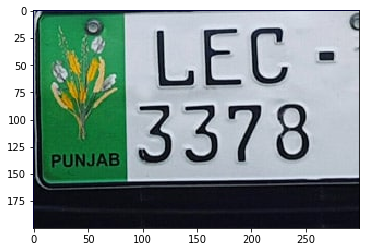

In [144]:
#License plate is extracted
convolution_result=test_picture[top_left[1]:bottom_right[1],top_left[0]:bottom_right[0]]
plt.imshow(convolution_result)

# Appendix B 

In [145]:
height,length,channels=convolution_result.shape
print(convolution_result.shape)

(200, 300, 3)


In [146]:
#Around 20% of the license plate is cropped(no matter what the size), to get rid of the green portion
length_start=length*0.25
height_end=height*0.95
math.ceil(length_start)
math.ceil(height_end)
print(math.ceil(length_start))

75


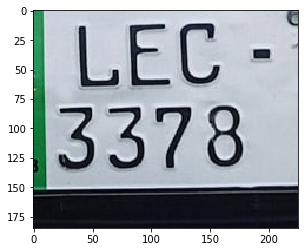

In [147]:
cropped=convolution_result[5:math.ceil(height_end),math.ceil(length_start)
:length]
plt.imshow(cropped)

In [148]:
#License plate is resized and blurred to get better results. Dilation may also be applied, depending on the camera

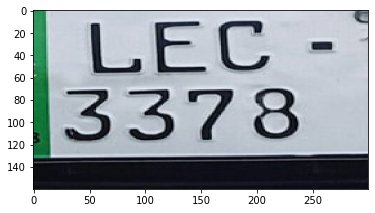

In [149]:
cropped_resized=cv2.resize(cropped,(300,160),interpolation=cv2.INTER_AREA)
plt.imshow(cropped_resized)

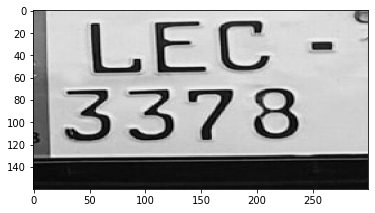

In [150]:
gray=cv2.cvtColor(cropped_resized,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap="gray")

[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


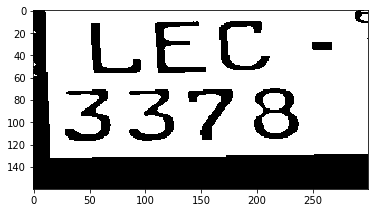

In [151]:
ret,thresh=cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
print(thresh)
plt.imshow(thresh,cmap="gray")

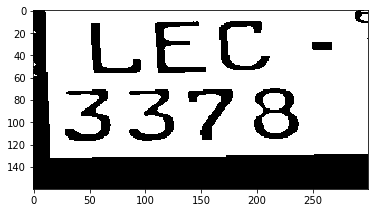

In [152]:
blur=cv2.blur(thresh,(1,1))
plt.imshow(blur,cmap="gray")

In [153]:
#The function below is used to sort the contours is order. X-axis and yaxis both

In [154]:
def get_contour_precedence(contour, cols):
    tolerance_factor = 10
    origin = cv2.boundingRect(contour)
    return ((origin[1] // tolerance_factor) * tolerance_factor) * cols + origin[0]

In [155]:
im, contours, h = cv2.findContours(blur, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
for (i,c) in enumerate(contours):
    if cv2.contourArea(c)>500:
        contours.sort(key=lambda x:get_contour_precedence(x, blur.shape[1]))
        print(cv2.contourArea(c))
# for (i,c) in enumerate(contours):
#     if cv2.contourArea(c)>500:
#         img = cv2.putText(blur, str(i), cv2.boundingRect(contours[i])[:2], cv2.FONT_HERSHEY_COMPLEX, 1, [25])
#         plt.imshow(blur,cmap="gray")


    

687.5
636.5
1483.0
859.5
792.0
687.5


# Appendix C

In [167]:
#the SVM model is uploaded

In [168]:
bordertype=cv2.BORDER_CONSTANT
value = [randint(255, 255), randint(255, 255), randint(255, 255)]

print("Loading model")
filename='./finalized_model.sav'
model=pickle.load(open(filename,'rb'))
print('Model loaded')
classification_result=[]

Loading model
Model loaded


11 0 289 132
LEC -)
(3378
[array(['R'], dtype='<U1'), array(['E'], dtype='<U1'), array(['C'], dtype='<U1'), array(['L'], dtype='<U1'), array(['8'], dtype='<U1'), array(['3'], dtype='<U1'), array(['3'], dtype='<U1'), array(['7'], dtype='<U1'), array(['R'], dtype='<U1')]
108 9 48 48

[array(['R'], dtype='<U1'), array(['E'], dtype='<U1'), array(['C'], dtype='<U1'), array(['L'], dtype='<U1'), array(['8'], dtype='<U1'), array(['3'], dtype='<U1'), array(['3'], dtype='<U1'), array(['7'], dtype='<U1'), array(['R'], dtype='<U1'), array(['E'], dtype='<U1')]
166 9 47 46

[array(['R'], dtype='<U1'), array(['E'], dtype='<U1'), array(['C'], dtype='<U1'), array(['L'], dtype='<U1'), array(['8'], dtype='<U1'), array(['3'], dtype='<U1'), array(['3'], dtype='<U1'), array(['7'], dtype='<U1'), array(['R'], dtype='<U1'), array(['E'], dtype='<U1'), array(['C'], dtype='<U1')]
51 11 47 46

[array(['R'], dtype='<U1'), array(['E'], dtype='<U1'), array(['C'], dtype='<U1'), array(['L'], dtype='<U1'), array(['8'], 

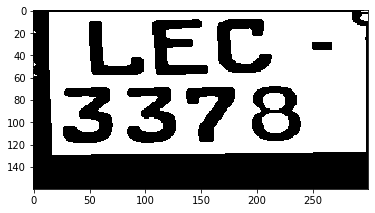

In [173]:
for (i,c) in enumerate(contours):
    if cv2.contourArea(c)>500:
        #Contours are drawn and their center points are taken
        cv2.drawContours(blur,[c],-1,(0,255,0),2)
        M=cv2.moments(c)
        cx=int(M['m10']/M['m00'])
        cy=int(M['m01']/M['m00'])
    #    cv2.putText(numbers,str(i+1),(cx,cy),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        plt.imshow(blur,cmap="gray")
        #This creates a bounding box the contours 
        (x,y,w,h)=cv2.boundingRect(c)
        print(x,y,w,h)
        numberscopy=blur
        cropped=numberscopy[y:y+h,x:x+w]     
        top = int(.25 * cropped.shape[0])  # shape[0] = rows
        bottom = top
        left = int(.25 * cropped.shape[1])  # shape[1] = cols
        right = left
        cropped=cv2.copyMakeBorder(cropped,top,bottom,left,right,bordertype,None,value)
        #We resize the cropped contour images into the size of data images and save them
        cropped=cv2.resize(cropped,(70,70),interpolation=cv2.INTER_AREA)
        output="Output/output_number" + str(i+1) + ".jpg"
        cv2.imwrite(output,cropped)
        print(pytesseract.image_to_string(cropped))
        cropped=cropped.reshape(1,-1)
        #this compares our saved image to our data to find the appropate result
        result=model.predict(cropped)
        classification_result.append(result)
        print(classification_result)

In [174]:
for i in classification_result:
    print(i,end="")

['R']['E']['C']['L']['8']['3']['3']['7']['R']['E']['C']['L']['8']['3']['3']['7']

In [175]:
m=len(classification_result)
final=[]
for i in range(1,8):
    final.append(classification_result[i])

In [176]:
final

[array(['E'], dtype='<U1'),
 array(['C'], dtype='<U1'),
 array(['L'], dtype='<U1'),
 array(['8'], dtype='<U1'),
 array(['3'], dtype='<U1'),
 array(['3'], dtype='<U1'),
 array(['7'], dtype='<U1')]